<a href="https://colab.research.google.com/github/ManishhDTU/DS-and-ML-project/blob/main/graduate_admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graduate Admission or Chance of AdmissionPrediction

Predict the chances of admission of a student to a Graduate program based on:

- GRE Scores (290 to 340)
- TOEFL Scores (92 to 120)
- University Rating (1 to 5)
- Statement of Purpose (1 to 5)
- Letter of Recommendation Strength (1 to 5)
- Undergraduate CGPA (6.8 to 9.92)
- Research Experience (0 or 1)
- Chance of Admit (0.34 to 0.97)

## Understanding historical data

2. Importing data of Students
- Reading the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Admission%20Chance.csv")

In [ ]:
data

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
data.columns

Index(['Serial No', 'GRE Score', 'TOEFL Score', 'University Rating', ' SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
data.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data.describe()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


3. Variable Identification

In [ ]:
data.dtypes

Serial No              int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
 SOP                 float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object


## Exploratory Data Analysis



#### 4. Missing Values

In [ ]:
data.isnull()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

Serial No            0
GRE Score            0
TOEFL Score          0
University Rating    0
 SOP                 0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#### Identifying and Removing Outliers

In [ ]:
# Outliers visualisation

<Axes: >

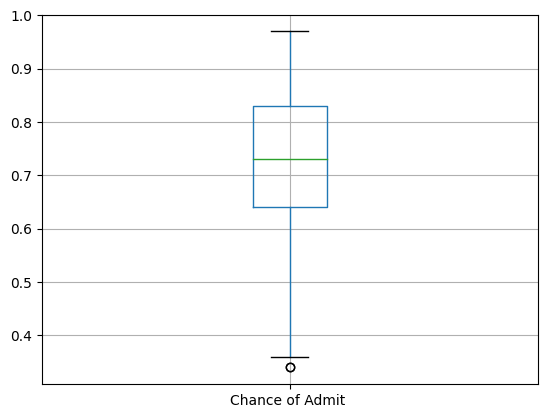

In [ ]:
data.boxplot(column =["Chance of Admit "])

<Axes: >

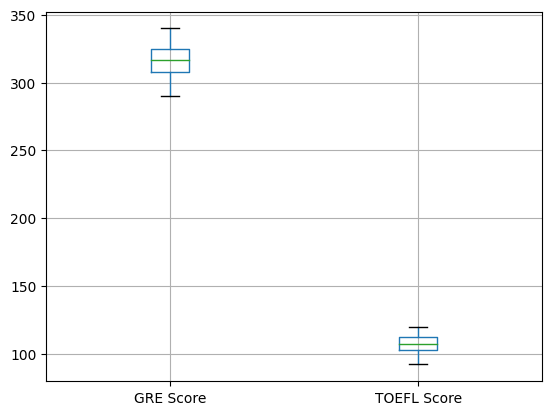

In [ ]:
data.boxplot(column=["GRE Score", "TOEFL Score"])

<Axes: >

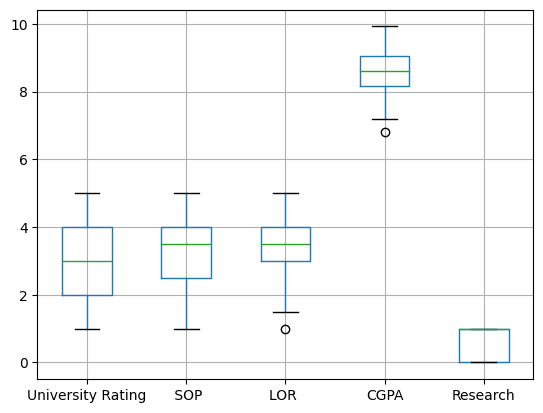

In [ ]:
data.boxplot(column =[  'University Rating', ' SOP',
       'LOR ', 'CGPA', 'Research'])

##### Removing Outlier by using IQR method

In [ ]:
# Dropping Serial No columnsas it is not required for prediction
data1 = data.copy()
data1.drop(["Serial No"],axis=1, inplace = True)

In [ ]:
# Calculating Quartiles of each feature
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 -Q1
print(IQR)

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
 SOP                  1.5000
LOR                   1.0000
CGPA                  0.8925
Research              1.0000
Chance of Admit       0.1900
dtype: float64


In [ ]:
# Identifying Outliers
df_out1 = data1[((data1 < (Q1 - 1.5 * IQR)) | (data1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
58,300,99,1,3.0,2.0,6.80,1,0.36
92,298,98,2,4.0,3.0,8.03,0,0.34
347,299,94,1,1.0,1.0,7.34,0,0.42
376,297,96,2,2.5,2.0,7.43,0,0.34


In [ ]:
"""
# removing outliers
df_out = data1(~((data1 < (Q1 - 1.5 * IQR)) | (data1 > (Q3 + 1.5 * IQR))).any(axis=1))
data = df_out.copy()
print(data.shape)
"""

'\n# removing outliers\ndf_out = data1(~((data1 < (Q1 - 1.5 * IQR)) | (data1 > (Q3 + 1.5 * IQR))).any(axis=1))\ndata = df_out.copy()\nprint(data.shape)\n'

In [ ]:
# removing outliers
df_out = data1.loc[~((data1 < (Q1 - 1.5 * IQR)) | (data1 > (Q3 + 1.5 * IQR))).any(axis=1)]
data = df_out.copy()
print(data.shape)

(396, 8)


### 6. Univariate analysis
#### Explore the mehods depends in type of variable.

Text(0.5, 0, 'Chances')

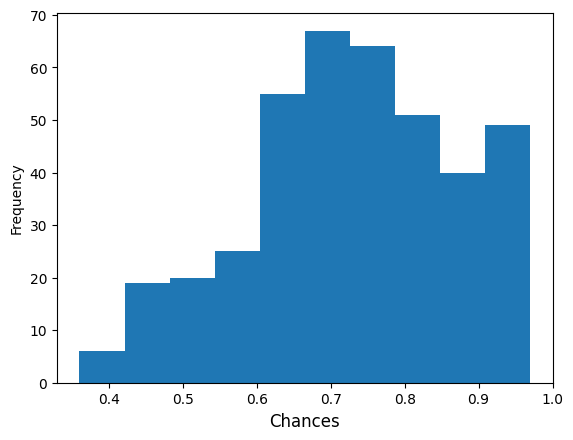

In [ ]:
data["Chance of Admit "].plot.hist()
plt.xlabel("Chances", fontsize = 12)

' data["Chance of Admit "].plot.hist()\n    plt.xlabel("Chances",fontsize =12) '

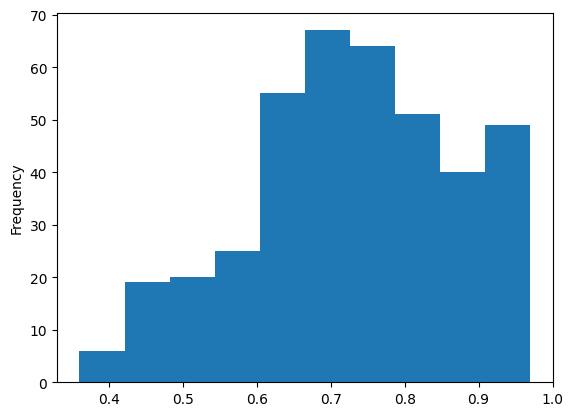

In [ ]:
## target variable
data["Chance of Admit "].plot.hist()

""" data["Chance of Admit "].plot.hist()
    plt.xlabel("Chances",fontsize =12) """
    # ---- these two line of code are not running at same time

In [ ]:
# data["Chance of Admit "].rename("Chances", inplace=True)

In [ ]:
"""
## target variable
data["Chance of Admit "].plot.hist()

# set the label of the "Chance of Admit " column to "Chances"
data["Chance of Admit "].rename("Chances", inplace=True)

# display the histogram with the updated label
data["Chances"].plot.hist()
"""

'\n## target variable\ndata["Chance of Admit "].plot.hist()\n\n# set the label of the "Chance of Admit " column to "Chances"\ndata["Chance of Admit "].rename("Chances", inplace=True)\n\n# display the histogram with the updated label\ndata["Chances"].plot.hist()\n'

Text(0.5, 0, 'Rating')

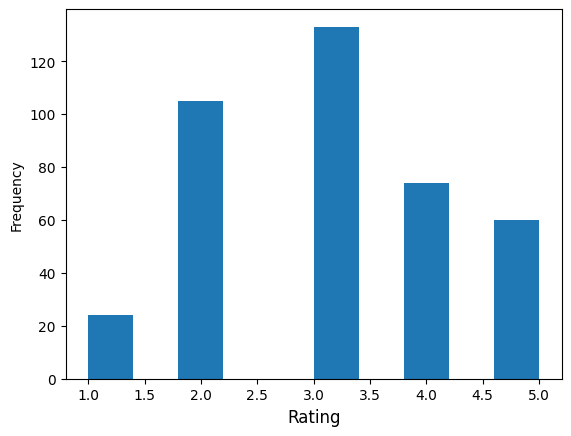

In [ ]:
data["University Rating"].plot.hist()
plt.xlabel("Rating", fontsize=12)

In [ ]:
data["Research"].value_counts()

Research
1    218
0    178
Name: count, dtype: int64

218 students have the research experience and 178 student haven't

### 7. Bivariate Analysis

<Axes: xlabel='GRE Score', ylabel='Chance of Admit '>

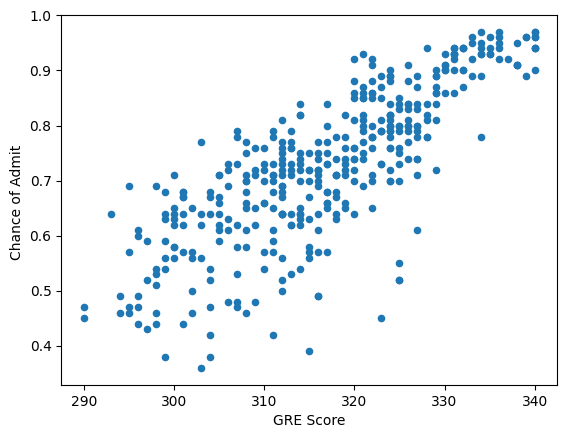

In [ ]:
data.plot.scatter('GRE Score','Chance of Admit ')

In [ ]:
data["GRE Score"].corr(data["Chance of Admit "])

0.7981446024321517

- GRE Score has strong positive correlation with target variable
- more the GRE Score, more posibilty to get admit

<Axes: xlabel='TOEFL Score', ylabel='Chance of Admit '>

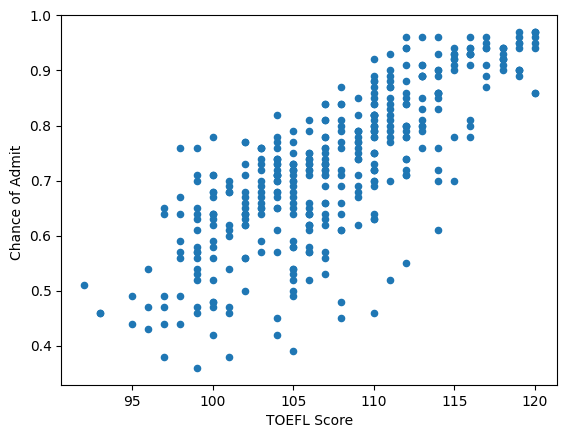

In [ ]:
data.plot.scatter('TOEFL Score','Chance of Admit ')

In [ ]:
data["TOEFL Score"].corr(data["Chance of Admit "])

0.7855190145501377

- Compare to the GRE, TOEFL is less correlation with Chance of Admit
- TOEFL Score also having positive correlation with Change of Admit

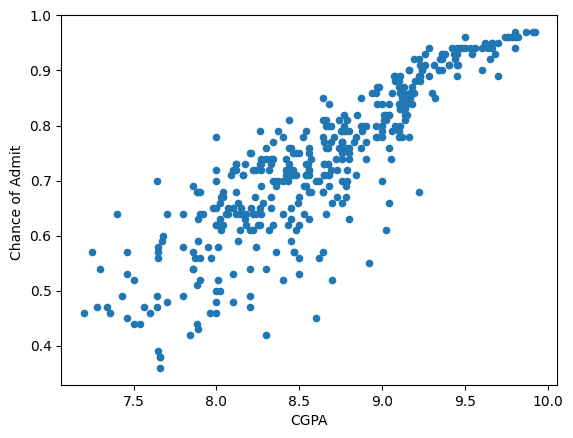

In [ ]:
a = data.plot.scatter("CGPA", "Chance of Admit ")

In [ ]:
data["CGPA"].corr(data["Chance of Admit "])

0.8709125643678217

- More the CGPA, student definatly get a good score in GRE and TOEFL

## Building the Model
#### In a model building part we use a "Sklearn" library. we use sklearn in:
- Preprocessing Data
- Model Selection and Training
- Prediction from Model
- Model Evaluation

8. Preprocessing data

In [ ]:
# separting independent and dependent variable
x = data.drop(["Chance of Admit "],axis = 1)
y = data["Chance of Admit "]
x.shape, y.shape

((396, 7), (396,))

In [ ]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, random_state = 56) # 80-20%
# x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 2529) -- both are same

9. Model Selection and Training

In [ ]:
# importing LinearRegression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
# Creating instance of Linear Regression
lr = LR()

In [ ]:
lr

LinearRegression()

In [ ]:
# lr = LR(normalize = True)
# this one is same as LR() but not giving output

In [ ]:
# fiiing the model
lr.fit(train_x, train_y)

LinearRegression()

In [ ]:
lr.coef_

array([ 0.00187439,  0.00265223,  0.01039544, -0.00349252,  0.02273899,
        0.09876469,  0.03153823])

In [ ]:
lr.intercept_

-1.116153427660005

10. Predict from Model

In [ ]:
# Predicting over the Train and Test set

train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print("Test Mean Absolute Error for training data :", k)

Test Mean Absolute Error for training data : 0.042322248248327504


In [ ]:
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print("Test Mean Absolute Error for testing data :", k)

Test Mean Absolute Error for testing data : 0.04759567870445303


11. *Model Evaluation*

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
pred_train = lr.predict(train_x)
train_score = np.sqrt(mean_squared_error(train_y, pred_train))
print(train_score)

0.060088762065116146


In [ ]:
pred_test = lr.predict(test_x)
test_score = np.sqrt(mean_squared_error(test_predict, test_y))
print(test_score)

0.06872031728014762


In [ ]:
print("Training Score : ", train_score)
print("Test Score : ", test_score)

Training Score :  0.060088762065116146
Test Score :  0.06872031728014762


# Conclusions

In [ ]:
test = lr.score(test_x, test_y)*100
train = lr.score(train_x, train_y)*100
print("Accuracy on train set :", train)
print("Accuracy on test set :", test)

Accuracy on train set : 80.4907328822083
Accuracy on test set : 77.60029591127442
